In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json
from pprint import pprint
from datetime import date
from citipy import citipy
from census import Census


# Census API Key
from config import api_key
c = Census(api_key, year=2013)


# Raw Data File (CSV)
raw_data_file = "./Tracking_Data_Per_State/Covid Tracking Project files.csv"
state_codes_file = "./Project 1 data/State_codes.csv"


raw_data_df = pd.read_csv(raw_data_file)
raw_data_df


,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_Latinx,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
0,20210224,AK,57988.0,17891.0,1476.0,NaN,2368.0,12079.0,1490.0,4389.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210224,AL,490220.0,157043.0,81137.0,NaN,2224.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210224,AR,317396.0,203622.0,50017.0,NaN,2851.0,1028.0,3341.0,1791.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210224,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210224,AZ,811968.0,302166.0,25199.0,240483.0,11633.0,39876.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5147,20200412,VT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5148,20200412,WA,10411.0,2903.0,289.0,1180.0,451.0,41.0,61.0,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5149,20200412,WI,3341.0,1680.0,857.0,NaN,81.0,28.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5150,20200412,WV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Remove states that are not offical states. Also removed Texas because it was an outlier.
not_states = ["AS","DC","FM","GU","MH","MP","PW","PR","TX"]

state_code_df = pd.read_csv(state_codes_file)

clean_df = raw_data_df[~raw_data_df.State.isin(not_states)]

cleaner_df = clean_df.groupby(['State'])
max_df = cleaner_df.max()
max_df.columns

max_df

,Date,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,...,Tests_Latinx,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
State,,,,,,,,,,,,,,,,,,,,,
AK,20210224,57988.0,17891.0,1476.0,NaN,2368.0,12079.0,1490.0,4389.0,7018.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL,20210224,490220.0,157043.0,81137.0,NaN,2224.0,NaN,NaN,NaN,37660.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR,20210224,317396.0,203622.0,50017.0,NaN,2851.0,1028.0,3409.0,1859.0,16100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZ,20210224,811968.0,302166.0,25199.0,240483.0,11633.0,39876.0,NaN,NaN,46613.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CA,20210224,3455361.0,534330.0,108479.0,1472040.0,181664.0,8740.0,15066.0,40426.0,307324.0,...,10721791.0,3761471.0,97097.0,218469.0,97097.0,6099478.0,17416589.0,10721791.0,20470224.0,17416589.0
CO,20210224,423558.0,174760.0,12283.0,116733.0,6142.0,2457.0,1228.0,6311.0,11384.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CT,20210224,278184.0,82973.0,19180.0,40646.0,2900.0,387.0,NaN,16685.0,14752.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DE,20210224,85506.0,41096.0,19233.0,14131.0,1785.0,NaN,NaN,295.0,5049.0,...,53538.0,15568.0,0.0,0.0,1433.0,57200.0,73995.0,53538.0,491881.0,73995.0
FL,20210224,1885661.0,640042.0,230333.0,586613.0,NaN,NaN,NaN,NaN,136314.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# max_df = max_df['Date', 'Cases_Total', 'Cases_White', 'Cases_Black', 'Cases_Latinx',
#        'Cases_Asian', 'Cases_AIAN', 'Cases_NHPI', 'Cases_Multiracial',
#        'Cases_Other', 'Cases_Unknown', 'Cases_Ethnicity_Hispanic',
#        'Cases_Ethnicity_NonHispanic', 'Cases_Ethnicity_Unknown',
#        'Deaths_Total', 'Deaths_White', 'Deaths_Black', 'Deaths_Latinx',
#        'Deaths_Asian', 'Deaths_AIAN', 'Deaths_NHPI', 'Deaths_Multiracial',
#        'Deaths_Other', 'Deaths_Unknown', 'Deaths_Ethnicity_Hispanic',
#        'Deaths_Ethnicity_NonHispanic', 'Deaths_Ethnicity_Unknown',
#        'Hosp_Total', 'Hosp_White', 'Hosp_Black', 'Hosp_Latinx', 'Hosp_Asian',
#        'Hosp_AIAN', 'Hosp_NHPI', 'Hosp_Multiracial', 'Hosp_Other',
#        'Hosp_Unknown', 'Hosp_Ethnicity_Hispanic', 'Hosp_Ethnicity_NonHispanic',
#        'Hosp_Ethnicity_Unknown', 'Tests_Total', 'Tests_White', 'Tests_Black',
#        'Tests_Latinx', 'Tests_Asian', 'Tests_AIAN', 'Tests_NHPI',
#        'Tests_Multiracial', 'Tests_Other', 'Tests_Unknown',
#        'Tests_Ethnicity_Hispanic', 'Tests_Ethnicity_NonHispanic',
#        'Tests_Ethnicity_Unknown']

In [15]:
states_data_df = max_df[['Cases_Total', 'Cases_White', 'Cases_Black', 'Cases_Latinx','Deaths_Total', 'Deaths_White', 'Deaths_Black', 'Deaths_Latinx']]
states_data_df = states_data_df.dropna()
states_data_df["White Death"] = round(states_data_df["Deaths_White"]/states_data_df["Cases_White"]*100,1)
states_data_df["Black Death"] = round(states_data_df["Deaths_Black"]/states_data_df["Cases_Black"]*100,1)
states_data_df["Latino Death"] = round(states_data_df["Deaths_Latinx"]/states_data_df["Cases_Latinx"]*100,1)
white = round(states_data_df["White Death"].mean(),1)
black = round(states_data_df["Black Death"].mean(),1)
latino = round(states_data_df["Latino Death"].mean(),1)
print(f"If you are white, you have a {white}% chance of not making it, if you are black {black}% and if you are latino {latino}%")

If you are white, you have a 2.9% chance of not making it, if you are black 2.1% and if you are latino 1.1%


In [67]:
cases_df = max_df[['Cases_Total', 'Cases_White', 'Cases_Black', 'Cases_Latinx']]
cases_df = cases_df.dropna()
cases_df

,Cases_Total,Cases_White,Cases_Black,Cases_Latinx
State,,,,
AZ,811968.0,302166.0,25199.0,240483.0
CA,3455361.0,534330.0,108479.0,1472040.0
CO,423558.0,174760.0,12283.0,116733.0
CT,278184.0,82973.0,19180.0,40646.0
DE,85506.0,41096.0,19233.0,14131.0
FL,1885661.0,640042.0,230333.0,586613.0
GA,994061.0,309658.0,209973.0,83563.0
IL,1179342.0,458272.0,108573.0,216461.0
MA,573885.0,214783.0,34754.0,123533.0


In [61]:
max_df.sum()/1000

Date                            1030721.424
Cases_Total                       28021.419
Cases_White                       10255.133
Cases_Black                        2318.793
Cases_Latinx                       3627.515
Cases_Asian                         547.921
Cases_AIAN                          219.888
Cases_NHPI                           50.287
Cases_Multiracial                   163.512
Cases_Other                        1560.361
Cases_Unknown                      9608.945
Cases_Ethnicity_Hispanic           4309.173
Cases_Ethnicity_NonHispanic       12259.326
Cases_Ethnicity_Unknown           11686.794
Deaths_Total                        501.263
Deaths_White                        280.321
Deaths_Black                         69.469
Deaths_Latinx                        79.003
Deaths_Asian                         16.058
Deaths_AIAN                           5.021
Deaths_NHPI                           0.760
Deaths_Multiracial                    2.183
Deaths_Other                    

<AxesSubplot:title={'center':'Mortality by State as (Number of Deaths/Number of Cases)'}, ylabel='State'>

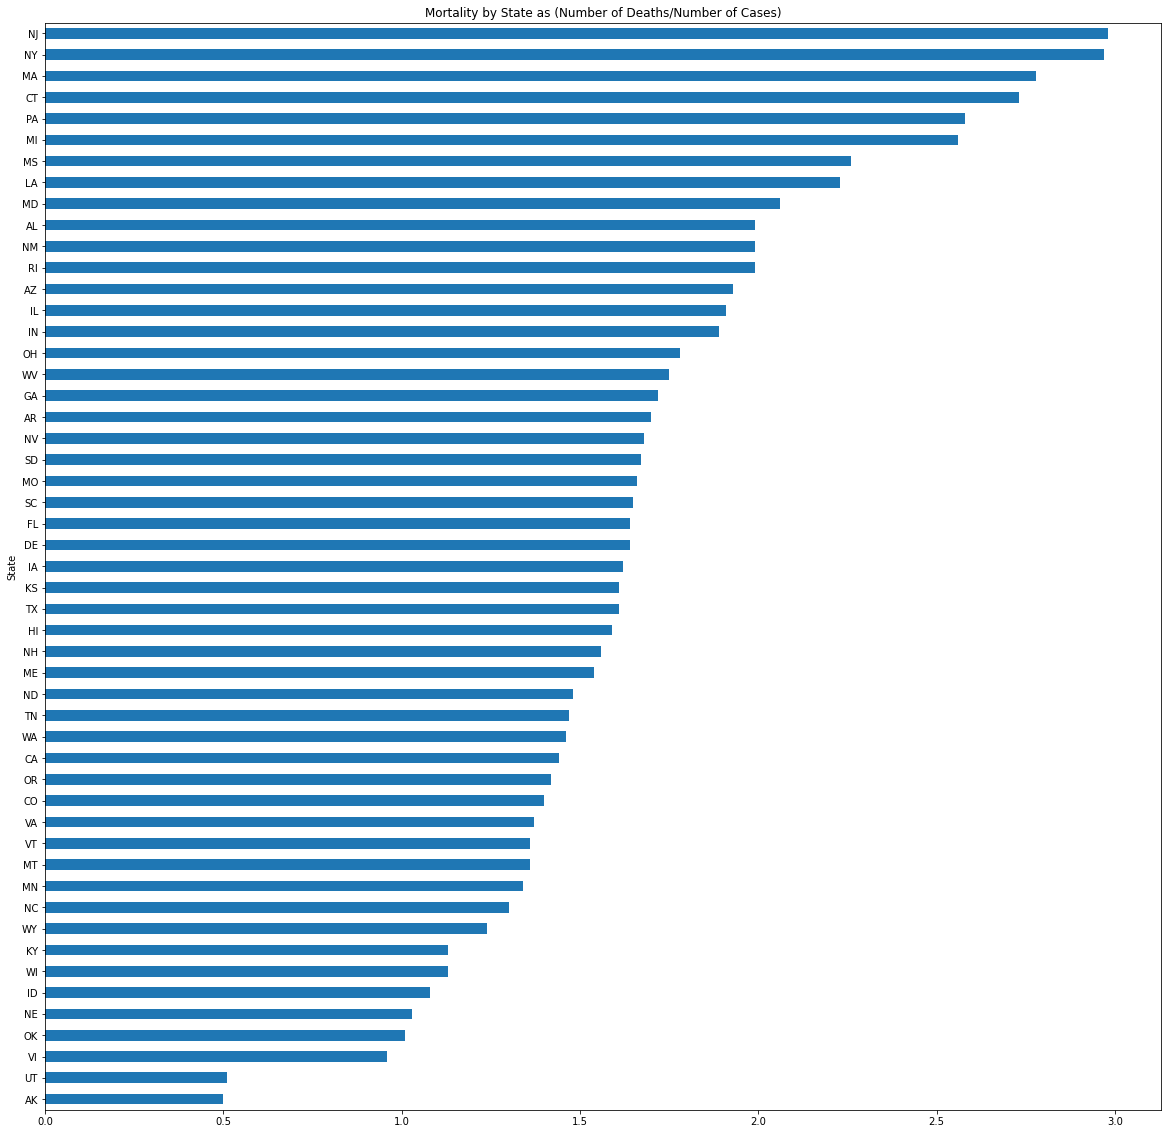

In [56]:
summary_df = max_df[['Cases_Total','Deaths_Total']]
summary_df = summary_df.dropna()
summary_df['Mortality']=round(summary_df['Deaths_Total']/summary_df['Cases_Total']*100,2)
summary_df = summary_df.sort_values(['Mortality'], ascending=True)
summary_df
summary_df['Mortality'].plot(kind="barh", figsize=(20,20), title="Mortality by State as (Number of Deaths/Number of Cases)")

In [ ]:
grouped_df = raw_data_df.groupby(["State"])
grouped_df.max()

In [16]:
url = "https://api.covidtracking.com/v1/states/current.json"
response = requests.get(url).json()
df = pd.DataFrame(response)
df



,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210304,AK,56745,NaN,NaN,NaN,totalTestsViral,1724484,32.0,1290.0,...,None,0,5,bc7a5cc276540e2ec8f649ab256aa42f63777463,0,0,0,0,0,
1,20210304,AL,498076,107404.0,1920535.0,NaN,totalTestsPeopleViral,2311207,544.0,45807.0,...,None,65,84,45b26555b46ec5f1a3ffcb116d0be102a0581a08,0,0,0,0,0,
2,20210304,AR,323756,68813.0,2464286.0,NaN,totalTestsViral,2719229,397.0,14876.0,...,None,12,50,a9cab41a8c2014380e4a91e6d95203151bf10bce,0,0,0,0,0,
3,20210304,AS,0,NaN,2140.0,NaN,totalTestsViral,2140,NaN,NaN,...,None,0,0,0522d89dc5db26466f6b16e91ebe46bd9e02d43b,0,0,0,0,0,
4,20210304,AZ,821108,55604.0,3032112.0,NaN,totalTestsViral,7775843,1072.0,57747.0,...,None,96,50,d6cff248209af76d6c668ae6bd9ebe30960f94c6,0,0,0,0,0,
5,20210304,CA,3488467,NaN,NaN,NaN,totalTestsViral,49147685,4967.0,NaN,...,None,273,0,cc0edfeae13c59b87ec961d01dac49137a894da9,0,0,0,0,0,
6,20210304,CO,433021,24067.0,2188741.0,NaN,totalTestEncountersViral,6310233,355.0,23791.0,...,None,4,56,3dad7a2f70c8ee10a5032db886738e97f5780c32,0,0,0,0,0,
7,20210304,CT,284500,19508.0,NaN,NaN,totalTestsViral,6478498,433.0,12257.0,...,None,15,0,e8ba6dd99cb242cb8105dcfad844a05b190f359d,0,0,0,0,0,
8,20210304,DC,41014,NaN,NaN,NaN,totalTestEncountersViral,1241816,170.0,NaN,...,None,1,0,decc668bf34f94ef9e4b9c90615c8cd404ee0037,0,0,0,0,0,
9,20210304,DE,87643,4672.0,541771.0,NaN,totalTestEncountersViral,1413640,130.0,NaN,...,None,4,0,bfd86c8bc01aad3ed98a58914737f44bc92b594f,0,0,0,0,0,


In [ ]:
df.columns